In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# grafikleri ggplot stilinde kullanalım 
plt.style.use("ggplot")

%matplotlib notebook

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
# 1. ve 3. özniteliği alalım
X = iris.data[:,[0,2]]
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [4]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<IPython.core.display.Javascript object>


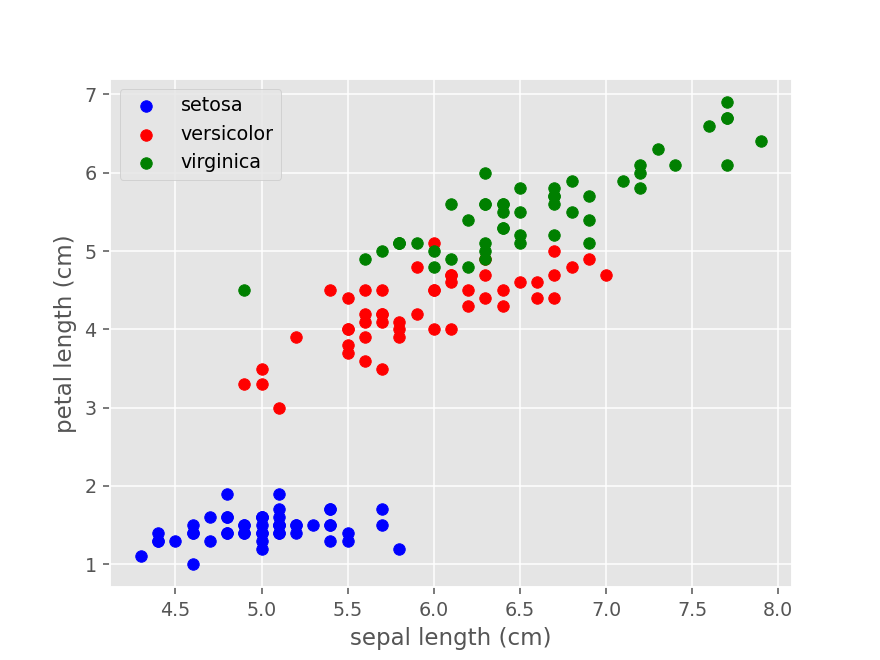

Text(0, 0.5, 'petal length (cm)')

In [5]:
plt.figure()

# SETOSA
plt.scatter(X[y==0, 0], X[y==0, 1], c="b")

# VERSİCOLOR
plt.scatter(X[y==1, 0], X[y==1, 1], c="r")

# VİRGİNİCA
plt.scatter(X[y==2, 0], X[y==2, 1], c="g")

plt.legend(iris.target_names)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

In [6]:
# Sınıflandırıcıyı(classifier) çağırmadan önce karar sınırlarını çizdirmek için fonksiyon hazırlayalım

def plot_decision_region(X,y,classifier, legend = [], resolution=0.02):
    
    # burada sınıf sayısı kadar modifiye etmek gerekiyor aksi takdirde hata alınır.
    markers = ("o","o","o") # işaretleyici şeklini belirliyoruz.
    colors = ("red","blue","green") # işaretçilerin renkleri
    
    # karar bölgesi ayarlanıyor
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # ravel() : orjinal dizinin görüntüsünü döndürür.
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="coolwarm")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    
    # legend kısımını düzegün göstermek için eklendi
    line_list = []
    # Örnekler çizdiriliyor
    for idx, cl in enumerate(np.unique(y)):
        dummy = plt.scatter(x = X[y==cl, 0],
                            y = X[y==cl, 1],
                            alpha=0.8,
                            c=colors[idx],
                            marker=markers[idx],
                            label=cl)
        line_list.append(dummy)
    
    plt.legend(line_list, legend)

<IPython.core.display.Javascript object>


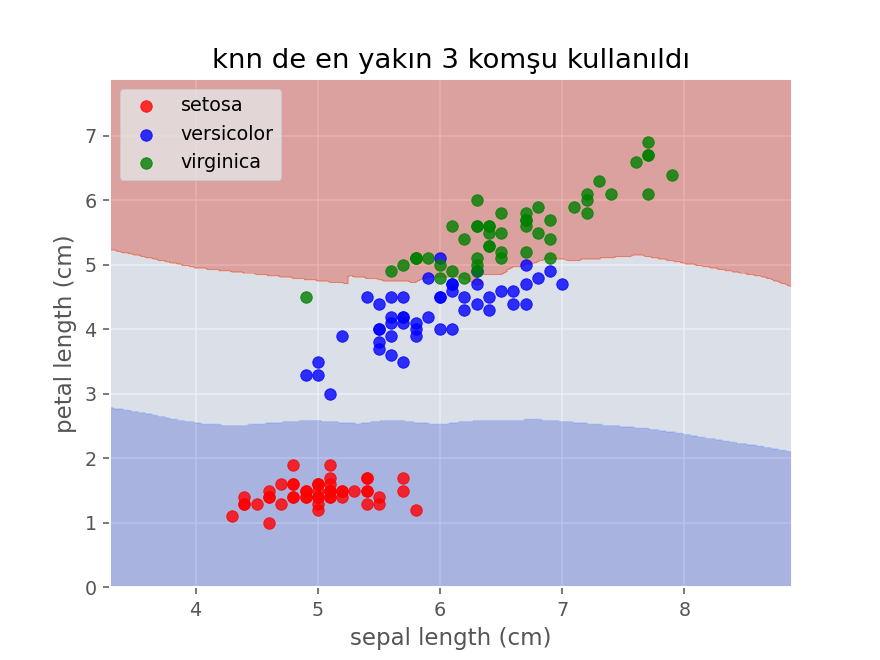

Text(0.5, 1.0, 'knn de en yakın 3 komşu kullanıldı')

In [7]:
# Sınıflandırıcıyı eğitelim ve görselleştirelim
knn = KNeighborsClassifier(n_neighbors=3, metric="euclidean")
knn.fit(X,y)

plt.figure()
plot_decision_region(X,y,knn,legend=iris.target_names)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("knn de en yakın 3 komşu kullanıldı")

####  k değerini arttıralım neler olacak bakalım. Değişimi daha iyi anlayabilmek için bu değeri 21 seçelim.

<IPython.core.display.Javascript object>


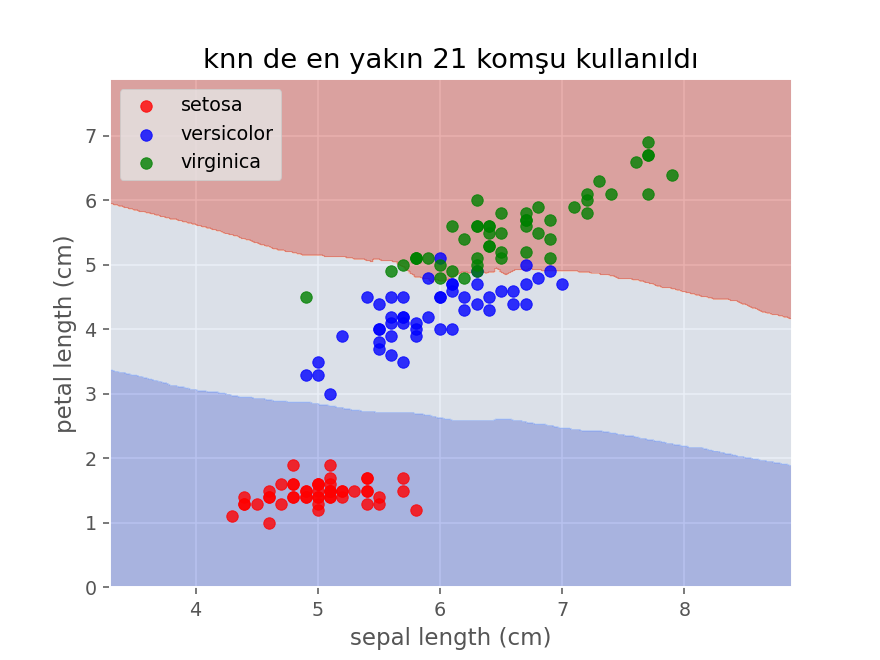

Text(0.5, 1.0, 'knn de en yakın 21 komşu kullanıldı')

In [8]:
knn = KNeighborsClassifier(n_neighbors=21, metric="euclidean")
knn.fit(X,y)

plt.figure()
plot_decision_region(X,y,knn,legend=iris.target_names)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("knn de en yakın 21 komşu kullanıldı")

* Gördüğünüz gibi sınır değişti, çünkü artık en yakın 21 komşuluk değerlendiriliyor. Bir de uzaklık ölçütünü değiştirelim bakalım neler olacak.

<IPython.core.display.Javascript object>


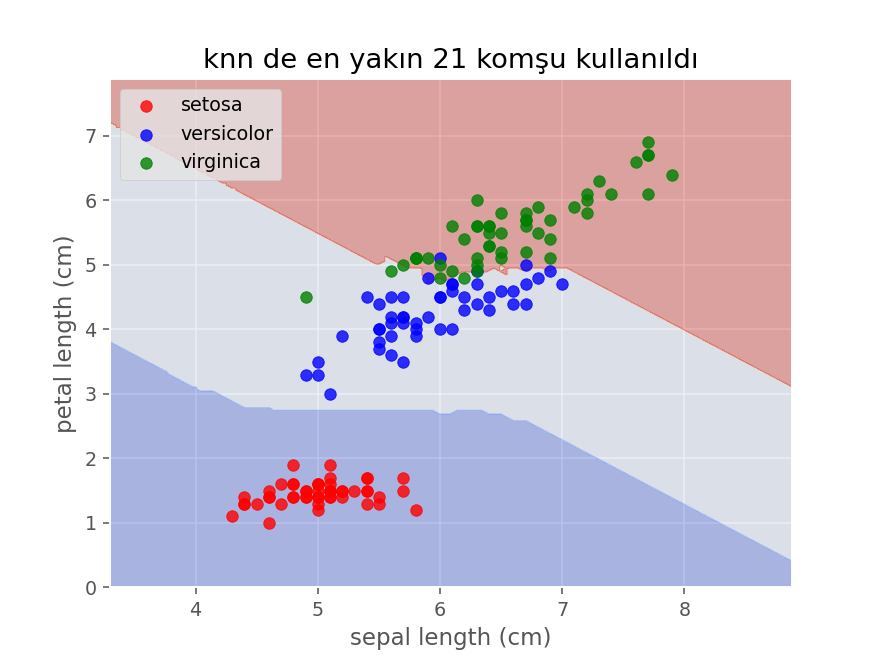

Text(0.5, 1.0, 'knn de en yakın 21 komşu kullanıldı')

In [9]:
kNN = KNeighborsClassifier(n_neighbors=21,metric="chebyshev")
kNN.fit(X,y)

plt.figure()
plot_decision_region(X,y,kNN,legend=iris.target_names)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])
plt.title("knn de en yakın 21 komşu kullanıldı")

Buradaki **"Chebysev"** metriği **"max(|x - y|)"** şeklinde tanımlandığı için karar sınırları oldukça değişti.